## **Linear Regression**
This is a simple linear regression task as it involves just two variables but I have also shown Polynomial regression model at the later part of this notebook which gives better prediction then simple linear regression model.

# Importing Libraries

In [71]:
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing Data set

In [72]:
# We are accessing the data set directly from the link "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

# Data Analysis

In [73]:
# top ten Rows of our data set
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [74]:
print(f'Data Set file contain {df.shape[0]} Rows and {df.shape[1]} columns .')
print(f'''
The column names are :
1-{df.columns[0]}
2-{df.columns[1]}''')

Data Set file contain 25 Rows and 2 columns .

The column names are :
1-Hours
2-Scores


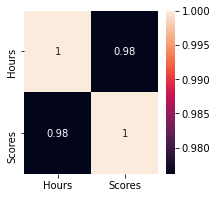

In [75]:
# Checking Correlation between the independent and dependent feature.
# Here, 'Hours' is independent feature where as 'Scores' is dependent feature.
fig1=plt.figure(figsize=(3,3))
ax1=sns.heatmap(df.corr(),annot=True)
fig1.savefig('Correlation.png')

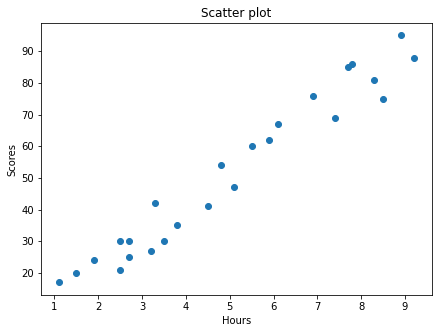

In [76]:
fig2=plt.figure(figsize=(7,5))
plt.scatter(df['Hours'],df['Scores'])
plt.title('Scatter plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
fig2.savefig('Hours and Scores Scatter Plot')

#### This is the Correlation between 'Hours' and 'Scores' columns data and as we can see that the correlation between them is 98% which is very high so we can use  'Hours' feature to predict 'Scores' of student. 

In [77]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

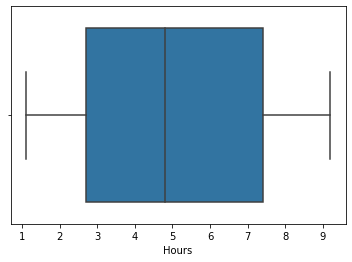

In [78]:
sns.boxplot(df['Hours'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

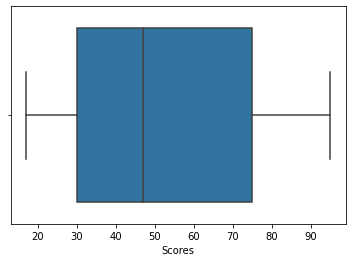

In [79]:
sns.boxplot(df['Scores'])

__There are no Outliers in both the features and both are Right Skew__

# Using the Sklearn Linear regression

In [80]:
# seperating  Independent Variable and Dependent Variable from data set
x=df.iloc[:,0:1].values   # Independent Variable
y=df.iloc[:, 1].values    # Dependent Variable

#### Spliting the data into training set and test set

In [81]:
from sklearn.model_selection import train_test_split
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
# Creating the model on the basis of Training set
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [83]:
# Using our model to predict values of test data set
ypred=lr.predict(xvalid)

#### Calculating the Error in our model

In [84]:

from sklearn import metrics
from math import sqrt

MSE= metrics.mean_squared_error(yvalid,ypred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 4.352380006653288


In [85]:
result=pd.DataFrame({'Hours' : xvalid.flatten() , 'Actual':yvalid , 'Predict' : ypred.round(2)})
result

,Hours,Actual,Predict
0,8.3,81,83.19
1,2.5,30,27.03
2,2.5,21,27.03
3,6.9,76,69.63
4,5.9,62,59.95


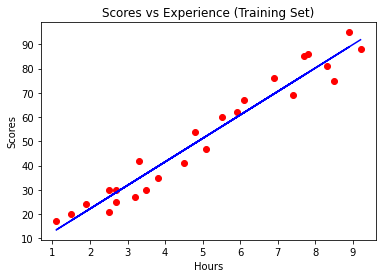

In [86]:
fig3=plt.figure()
plt.scatter(x, y, color = 'red')
plt.plot(xtrain,lr.predict(xtrain), color = 'blue')
plt.title('Scores vs Experience (Training Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
fig3.savefig('Train DataSet Regression plot')

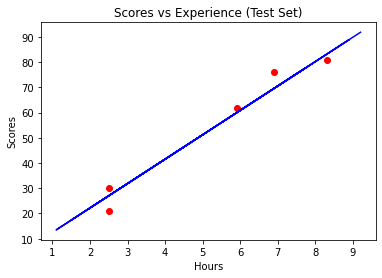

In [87]:
fig4=plt.figure()
plt.scatter(xvalid, yvalid, color = 'red')
plt.plot(xtrain,lr.predict(xtrain), color = 'blue')
plt.title('Scores vs Experience (Test Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
fig4.savefig('Test DataSet Regression plot')

In [88]:
hours=9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


__Input manually the number of hours of study to predict the score achived by the student.__

In [102]:
hour=float(input('Enter the number of Hours :'))
own_pred = lr.predict([[hour]])
print(f'No of Hours = {hour}')
print(f"Predicted Score = {own_pred[0]}")

Enter the number of Hours :8
No of Hours = 8.0
Predicted Score = 80.28351758954531


# Using Polynomial regression

__I used polynomial regression because on visualing the data we can see that  
at [3 to 5] most points are on lower side of best fit line and   
at [5 to 8] most points are on upper side of best fit line.__

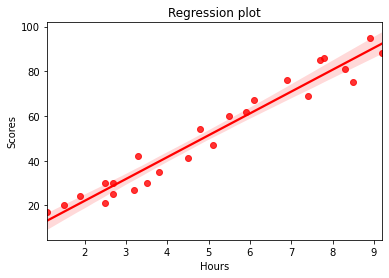

In [90]:
fig5=plt.figure()
sns.regplot( x="Hours", y="Scores" , data=df,color='red');
plt.title('Regression plot');
fig5.savefig('Regression plot.png')

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(xtrain)


In [92]:
lr_poly = LinearRegression()
lr_poly.fit(x_poly, ytrain)

LinearRegression()

creating a Dataframe of xtrain and predicted scores on basis of xtrain

In [93]:
re=pd.DataFrame({'x':xtrain.flatten(),'ypred':lr_poly.predict(poly_reg.fit_transform(xtrain))})
re.sort_values('x',inplace=True)
re.T

,17,4,11,0,10,5,1,9,3,6,12,2,15,13,18,16,14,8,7,19
x,1.100000,1.500000,1.900000,2.700000,2.700000,3.200000,3.300000,3.500000,3.800000,4.500000,4.800000,5.100000,5.500000,6.100000,7.400000,7.700000,7.800000,8.500000,8.900000,9.200000
ypred,16.571032,20.884881,23.660338,27.881243,27.881243,31.103308,31.865337,33.522203,36.345263,44.359178,48.249927,52.282734,57.697511,65.392526,77.683914,79.576003,80.154794,84.140556,87.211065,90.536944


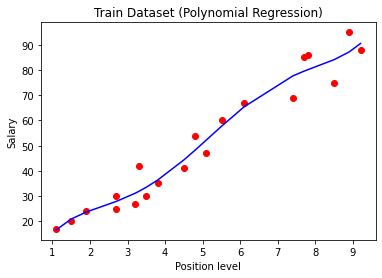

In [94]:
fig7=plt.figure()
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(re.x, re.ypred, color = 'blue')
plt.title('Train Dataset (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
fig7.savefig('Polynomial Regression plot.png')

In [95]:
# Using our model to predict values of test data set
ypred2=lr_poly.predict(poly_reg.fit_transform(xvalid))

In [96]:
result=pd.DataFrame({'Hours' : xvalid.flatten() , 'Actual':yvalid , 'Simple_linear_Predict' : ypred.round(2),'poly_regression_predict': ypred2.round(2)})
result

,Hours,Actual,Simple_linear_Predict,poly_regression_predict
0,8.3,81,83.19,82.93
1,2.5,30,27.03,26.80
2,2.5,21,27.03,26.80
3,6.9,76,69.63,73.80
4,5.9,62,59.95,62.92


__As we can clearly see that 4 out of 5 result of polynomial regression model are better then simple linear regression model.__

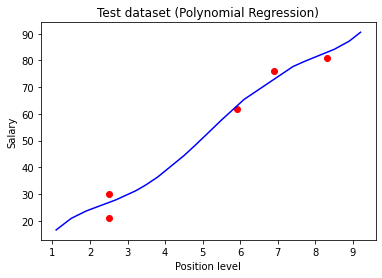

In [97]:
fig7=plt.figure()
plt.scatter(xvalid, yvalid, color = 'red')
plt.plot(re.x, re.ypred, color = 'blue')
plt.title('Test dataset (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
fig7.savefig('Polynomial Regression predict plot.png')

In [98]:
# Calculating the Error in our model
from sklearn import metrics
MSE= metrics.mean_squared_error(yvalid,ypred2)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 3.2654437266142056


#### Predicting the score if A student Studies for 9.25 Hours.

In [99]:
hours=9.25
own_pred = lr_poly.predict(poly_reg.fit_transform([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.21352195640313


#### Predict the score of any student . Just enter the number of hours he studies.

In [101]:
hour=float(input('Enter the number of Hours :'))
own_pred = lr2.predict(poly_reg.fit_transform([[hour]]))
print(f'No of Hours = {hour}')
print(f"Predicted Score = {own_pred[0]}")

Enter the number of Hours :8
No of Hours = 8.0
Predicted Score = 81.26721806724433
